## 1. Problem Definition

In a statement
>On the basis of daily weather observations from past 10 years in many locations across Australia predict whether there will be rain tomorrow or not.

## 2. Data
Observations were drawn from numerous weather stations. Original Data can be accessed through http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

## 3. Features

1. Date - The Date of Observation
2. Location - The common name of the location of the weather station
3. MinTemp - The minimum temperature in degrees celsius
4. MaxTemp - The maximum temperature in degrees celsius
5. Rainfall - The amount of rainfall recorded for the day in mm
6. Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine - The number of hours of bright sunshine in the day.
8. WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight.
9. WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am - Direction of the wind at 9am
11. WindDir3pm - Direction of the wind at 3pm
12. WindSpeed9am - Speed of the wind at 9am in km/hr
13. WindSpeed3pm - Speed of the wind at 3pm in km/hr
14. Humidity9am - Relative Humidity at 9am in percentages
15. Humidity3pm - Relative Humidity at 3pm in percentages
16. Pressure9am - Atmospheric pressure reduced to mean sea level at 9am in hectopascals
17. Pressure3pm - Atmospheric pressure reduced to mean sea level at 9 am in hectopascals
18. Cloud9am - 	Fraction of sky obscured by cloud at 9am
19. Cloud3pm - 	Fraction of sky obscured by cloud at 3pm
20. Temp9am - Temperature at 9am in degree celsius
21. Temp3pm - Temperature at 3pm in degree celsius
22. RainToday - Binary values
23. RainTomorrow - Binary values


## Preparing our tools
We are going to use pandas ,matplotlib, seaborn and numpy libraries for data visualisation and manipulation.

In [1]:
#Regular explaratory data analysis (EDA) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#to perform mean imputation
from sklearn.impute import KNNImputer
from collections import Counter

#library imbalanced-learn to deal with data imbalance. To use SMOTE for oversampling
from imblearn.over_sampling import SMOTE

#for standardising each feature variable
from sklearn.preprocessing import StandardScaler

#Models from Sckit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Model Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve , accuracy_score,plot_confusion_matrix,roc_curve,auc,precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

## Importing our Dataset

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving weatherAUS.csv.zip to weatherAUS.csv.zip


In [3]:
import zipfile as zf
zfile = zf.ZipFile('weatherAUS.csv.zip') 
data = pd.read_csv(zfile.open('weatherAUS.csv'))



## Exploratiory Data Analysis (EDA)

In [4]:
data.shape

(145460, 23)

In [5]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
data.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[5 rows x 23 columns]

In [7]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
#Statistical properties of dataset
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [10]:
#Statistical properties of dataset including categorical features as well
data.describe(include='all')

Date  Location        MinTemp        MaxTemp       Rainfall  \
count       145460    145460  143975.000000  144199.000000  142199.000000   
unique        3436        49            NaN            NaN            NaN   
top     2013-11-12  Canberra            NaN            NaN            NaN   
freq            49      3436            NaN            NaN            NaN   
mean           NaN       NaN      12.194034      23.221348       2.360918   
std            NaN       NaN       6.398495       7.119049       8.478060   
min            NaN       NaN      -8.500000      -4.800000       0.000000   
25%            NaN       NaN       7.600000      17.900000       0.000000   
50%            NaN       NaN      12.000000      22.600000       0.000000   
75%            NaN       NaN      16.900000      28.200000       0.800000   
max            NaN       NaN      33.900000      48.100000     371.000000   

         Evaporation      Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   82670.000000  75625.000000      135134  135197.000000     134894  ...   
unique           NaN           NaN          16            NaN         16  ...   
top              NaN           NaN           W            NaN          N  ...   
freq             NaN           NaN        9915            NaN      11758  ...   
mean        5.468232      7.611178         NaN      40.035230        NaN  ...   
std         4.193704      3.785483         NaN      13.607062        NaN  ...   
min         0.000000      0.000000         NaN       6.000000        NaN  ...   
25%         2.600000      4.800000         NaN      31.000000        NaN  ...   
50%         4.800000      8.400000         NaN      39.000000        NaN  ...   
75%         7.400000     10.600000         NaN      48.000000        NaN  ...   
max       145.000000     14.500000         NaN     135.000000        NaN  ...   

          Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count   142806.000000  140953.000000  130395.00000  130432.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean        68.880831      51.539116    1017.64994    1015.255889   
std         19.029164      20.795902       7.10653       7.037414   
min          0.000000       0.000000     980.50000     977.100000   
25%         57.000000      37.000000    1012.90000    1010.400000   
50%         70.000000      52.000000    1017.60000    1015.200000   
75%         83.000000      66.000000    1022.40000    1020.000000   
max        100.000000     100.000000    1041.00000    1039.600000   

            Cloud9am      Cloud3pm        Temp9am       Temp3pm  RainToday  \
count   89572.000000  86102.000000  143693.000000  141851.00000     142199   
unique           NaN           NaN            NaN           NaN          2   
top              NaN           NaN            NaN           NaN         No   
freq             NaN           NaN            NaN           NaN     110319   
mean        4.447461      4.509930      16.990631      21.68339        NaN   
std         2.887159      2.720357       6.488753       6.93665        NaN   
min         0.000000      0.000000      -7.200000      -5.40000        NaN   
25%         1.000000      2.000000      12.300000      16.60000        NaN   
50%         5.000000      5.000000      16.700000      21.10000        NaN   
75%         7.000000      7.000000      21.600000      26.40000        NaN   
max         9.000000      9.000000      40.200000      46.70000        NaN   

        RainTomorrow  
count         142193  
unique             2  
top               No  
freq          110316  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN  

[11 rows x 23 columns]

## Finding Numerical and Categorical features in the dataset

In [11]:
#finding numerical features in the dataset
num_features = [feature for feature in data.columns if data[feature].dtype=='float']

print("there are {} numerical features-\n ".format(len(num_features)))
print("Columns with numerical features are-\n",num_features)

there are 16 numerical features-
 
Columns with numerical features are-
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
#finding categorical features in the dataset
cat_features = [feature for feature in data.columns if data[feature].dtype=='O']

print("there are {} categorical features-\n ".format(len(cat_features)))
print("Columns with categorical features are-\n",cat_features)

there are 7 categorical features-
 
Columns with categorical features are-
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


## Finding and Filling missing values

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)

In [14]:

#to check if there are missing values in the dataset
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Figure size 720x432 with 0 Axes>

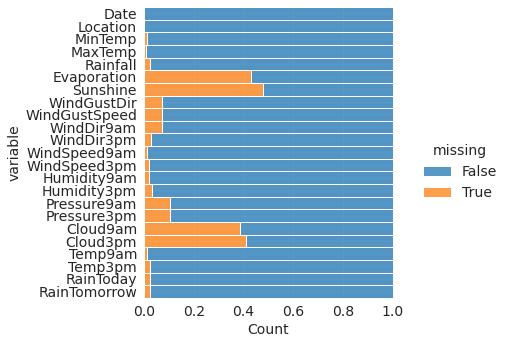

In [15]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.20
);

In our dataset there are lot of missing values , Which needs to be treated.

In [16]:


#features with missing values 
missing = data.isnull().sum().sort_values(ascending=False)
missing_per = (missing/len(data))*100

#percentage of missing values
pd.DataFrame({"Missing_Records":missing,"percentage of missing data":missing_per.values})

Missing_Records  percentage of missing data
Sunshine                 69835                   48.009762
Evaporation              62790                   43.166506
Cloud3pm                 59358                   40.807095
Cloud9am                 55888                   38.421559
Pressure9am              15065                   10.356799
Pressure3pm              15028                   10.331363
WindDir9am               10566                    7.263853
WindGustDir              10326                    7.098859
WindGustSpeed            10263                    7.055548
Humidity3pm               4507                    3.098446
WindDir3pm                4228                    2.906641
Temp3pm                   3609                    2.481094
RainTomorrow              3267                    2.245978
Rainfall                  3261                    2.241853
RainToday                 3261                    2.241853
WindSpeed3pm              3062                    2.105046
Humidity9am               2654                    1.824557
Temp9am                   1767                    1.214767
WindSpeed9am              1767                    1.214767
MinTemp                   1485                    1.020899
MaxTemp                   1261                    0.866905
Location                     0                    0.000000
Date                         0                    0.000000


* since we are predicting rain, we will delete records with missing values at the `RainToday` and `RainTomorrow` columns.

* We can see that approximately 40% of `Evaporation`,`Sunshine`,`Cloud9am`,`Cloud3pm`, columns have missing values . filling these columns could result in outliers. therefore they will be romoved from the dataset.

* The remaining categorical features with missing values will be imputed with most repeated values.

* The remaining numerical features with missing values will be imputed with median (because it robust average which is uneffected in presence of outliers). 



In [17]:
df= data.dropna(subset=['RainToday','RainTomorrow'])
px.histogram(df,x="Location",title="Location vs Rainy Days",color="RainToday")

In [18]:
px.histogram(df,x="Temp3pm",title="Temp. at 3pm vs RainTomorrow",color="RainTomorrow")

In [19]:

#mean temperature at 3pm depending on RainTomorrow
print("mean temp when it rains tomorrow")
print(df[["RainTomorrow","Temp3pm"]].groupby("RainTomorrow").mean())

mean temp when it rains tomorrow
                Temp3pm
RainTomorrow           
No            22.405090
Yes           19.181358


 when it rains tomorrow the temperature of today is slightly slower than when it is not going to rain

In [20]:
px.histogram(df,x="RainTomorrow",color="RainToday",title="RainTomorrow vs RainToday")

we can see class imbalance problem is present here

In [21]:
px.scatter(df.sample(2000),title="Min.Temp vs Max.Temp",x="MinTemp",y="MaxTemp",color="RainToday")

In [22]:
px.scatter(df.sample(2000),title="Temp (3 pm) vs Humidity (3 pm) " , x="Temp3pm",y='Humidity3pm',color='RainTomorrow')

# Feature Engineering

## Handling Missing values by deleting columns

* Deleting null rows from `RainToday`, and `RainTomorrow` columns.
* Removing `Evaporation` , `Sunshine`, `Cloud9am` , `Cloud3pm` columns from our dataset as around 40% data is missing in these columns.

<Figure size 720x432 with 0 Axes>

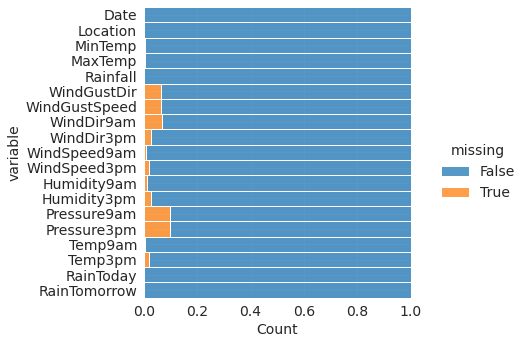

In [23]:
data.dropna(subset=['RainToday','RainTomorrow'], inplace = True)
data.drop(['Cloud9am', 'Cloud3pm','Evaporation','Sunshine'], axis=1, inplace=True)
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

we'll seperate the `Date` Variable into two variables and then drop the date variable

In [24]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.drop('Date',inplace=True, axis=1)
data

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury     13.4     22.9       0.6           W           44.0   
1        Albury      7.4     25.1       0.0         WNW           44.0   
2        Albury     12.9     25.7       0.0         WSW           46.0   
3        Albury      9.2     28.0       0.0          NE           24.0   
4        Albury     17.5     32.3       1.0           W           41.0   
...         ...      ...      ...       ...         ...            ...   
145454    Uluru      3.5     21.8       0.0           E           31.0   
145455    Uluru      2.8     23.4       0.0           E           31.0   
145456    Uluru      3.6     25.3       0.0         NNW           22.0   
145457    Uluru      5.4     26.9       0.0           N           37.0   
145458    Uluru      7.8     27.0       0.0          SE           28.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW          20.0          24.0         71.0   
1             NNW        WSW           4.0          22.0         44.0   
2               W        WSW          19.0          26.0         38.0   
3              SE          E          11.0           9.0         45.0   
4             ENE         NW           7.0          20.0         82.0   
...           ...        ...           ...           ...          ...   
145454        ESE          E          15.0          13.0         59.0   
145455         SE        ENE          13.0          11.0         51.0   
145456         SE          N          13.0           9.0         56.0   
145457         SE        WNW           9.0           9.0         53.0   
145458        SSE          N          13.0           7.0         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm RainToday  \
0              22.0       1007.7       1007.1     16.9     21.8        No   
1              25.0       1010.6       1007.8     17.2     24.3        No   
2              30.0       1007.6       1008.7     21.0     23.2        No   
3              16.0       1017.6       1012.8     18.1     26.5        No   
4              33.0       1010.8       1006.0     17.8     29.7        No   
...             ...          ...          ...      ...      ...       ...   
145454         27.0       1024.7       1021.2      9.4     20.9        No   
145455         24.0       1024.6       1020.3     10.1     22.4        No   
145456         21.0       1023.5       1019.1     10.9     24.5        No   
145457         24.0       1021.0       1016.8     12.5     26.1        No   
145458         24.0       1019.4       1016.5     15.1     26.0        No   

       RainTomorrow  Year  Month  
0                No  2008     12  
1                No  2008     12  
2                No  2008     12  
3                No  2008     12  
4                No  2008     12  
...             ...   ...    ...  
145454           No  2017      6  
145455           No  2017      6  
145456           No  2017      6  
145457           No  2017      6  
145458           No  2017      6  

[140787 rows x 20 columns]

Let's check the count of `RainTomorrow` monthly and yearly

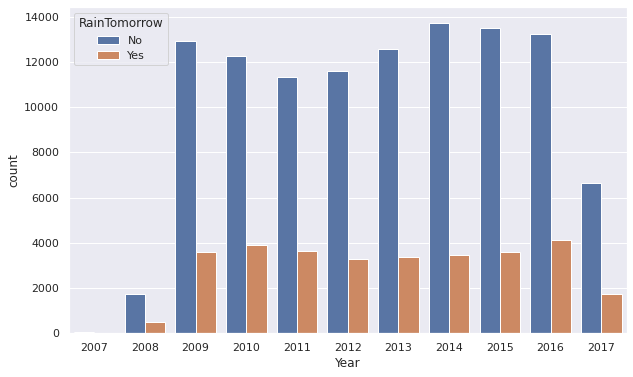

In [25]:

sns.set_theme(style='darkgrid')
sns.countplot(x='Year', hue='RainTomorrow', data=data)

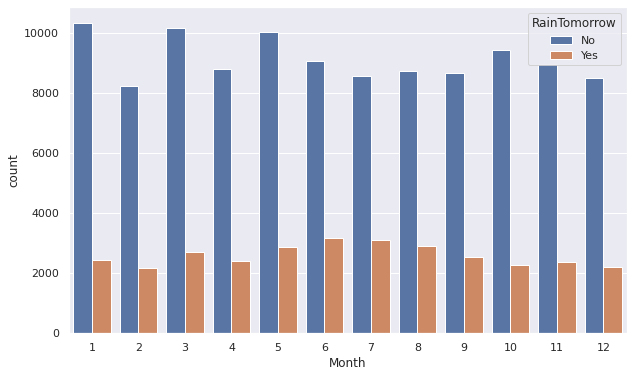

In [26]:
sns.countplot(x='Month', hue='RainTomorrow', data=data)

In [27]:
#Listing columns with same datatype in vector
num_features = [column_name for column_name in data.columns if  data[column_name].dtype=='float64']
cat_features = [column_name for column_name in data.columns if data[column_name].dtype=='object' or data[column_name].dtype=='int64']
print("Columns with numerical datatypes-\n",(num_features))
print("columns with categorical datatypes-\n",(cat_features))

Columns with numerical datatypes-
 ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
columns with categorical datatypes-
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month']


In [28]:
#List of numbers of different categorical values in each categorical columns
print(data[cat_features].nunique())

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
Year            11
Month           12
dtype: int64


## Standardising numerical columns

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[num_features]=scaler.fit_transform(data[num_features])
data[num_features].head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.189757 -0.047104 -0.206727       0.296762      0.676275      0.610232   
1 -0.747179  0.262125 -0.277606       0.296762     -1.124274      0.382909   
2  0.111679  0.346460 -0.277606       0.444058      0.563741      0.837555   
3 -0.466098  0.669744 -0.277606      -1.176193     -0.336533     -1.094689   
4  0.829996  1.274146 -0.159474       0.075819     -0.786671      0.155586   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0     0.113996    -1.415339    -1.401098    -1.159562 -0.013403  0.015397  
1    -1.302317    -1.271158    -0.992926    -1.060065  0.032779  0.375743  
2    -1.617054    -1.030857    -1.415173    -0.932140  0.617756  0.217191  
3    -1.249861    -1.703700    -0.007682    -0.349372  0.171326  0.692849  
4     0.691012    -0.886677    -0.964776    -1.315914  0.125144  1.154093

## Creating Boxplot for every numerical column

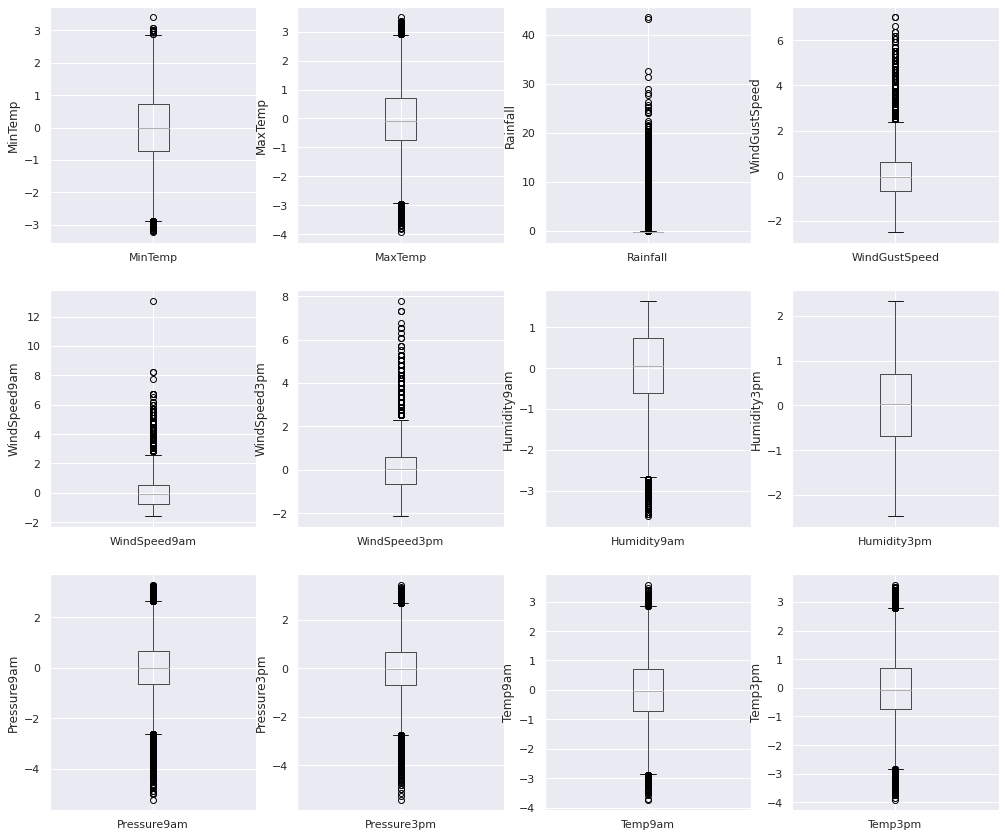

In [30]:
#Creating boxplot for every numerical columns in data
plt.figure(figsize=(17,20))
for i in range(len(num_features)):
  plt.subplot(4,4,i+1)
  fig = data.boxplot(column=num_features[i])
  fig.set_title("")
  fig.set_ylabel(num_features[i])

In [31]:
print("count of `RainTomorrow` before removing outliers")
print(Counter(data["RainTomorrow"]))

count of `RainTomorrow` before removing outliers
Counter({'No': 109586, 'Yes': 31201})


## Removing outliers

In [32]:


#Removing outliers from numerical columns of the dataset
Q1 = data[num_features].quantile(0.25)
Q3 = data[num_features].quantile(0.75)
IQR = Q3-Q1

pd.concat([Q1,Q3,IQR],axis=1,keys=['Q1','Q2','IQR'])

Q1        Q2       IQR
MinTemp       -0.715947  0.720687  1.436634
MaxTemp       -0.749897  0.711912  1.461809
Rainfall      -0.277606 -0.183101  0.094505
WindGustSpeed -0.660658  0.591353  1.252012
WindSpeed9am  -0.786671  0.563741  1.350412
WindSpeed3pm  -0.640043  0.610232  1.250275
Humidity9am   -0.620389  0.743468  1.363857
Humidity3pm   -0.694436  0.699310  1.393746
Pressure9am   -0.655128  0.667914  1.323042
Pressure3pm   -0.690504  0.674027  1.364531
Temp9am       -0.721532  0.710120  1.431653
Temp3pm       -0.734125  0.678435  1.412560

In [33]:
for i,features in enumerate(num_features):
  data[features]=np.where(data[features]>Q3[i]+1.5*IQR[i],Q3[i]+1.5*IQR[i],data[features])
  data[features]=np.where(data[features]<Q1[i]-1.5*IQR[i],Q1[i]-1.5*IQR[i],data[features])

In [34]:
data[num_features].describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  140319.000000  140480.000000  140787.000000  131682.000000   
mean        0.000027       0.000401      -0.220227      -0.014271   
std         0.999860       0.997879       0.093543       0.954742   
min        -2.870899      -2.942610      -0.277606      -2.501852   
25%        -0.715947      -0.749897      -0.277606      -0.660658   
50%        -0.028861      -0.089272      -0.277606      -0.071477   
75%         0.720687       0.711912      -0.183101       0.591353   
max         2.875639       2.904625      -0.041343       2.469370   

        WindSpeed9am   WindSpeed3pm    Humidity9am   Humidity3pm  \
count  139732.000000  138256.000000  139270.000000  1.372860e+05   
mean       -0.010052      -0.009993       0.002823  4.968613e-17   
std         0.966274       0.968561       0.991858  1.000004e+00   
min        -1.574411      -2.117641      -2.666174 -2.472663e+00   
25%        -0.786671      -0.640043      -0.620389 -6.944358e-01   
50%        -0.111465       0.041925       0.061540  2.646732e-02   
75%         0.563741       0.610232       0.743468  6.993102e-01   
max         2.589359       2.485644       1.635221  2.333357e+00   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  127044.000000  127018.000000  140131.000000  138163.000000  
mean        0.003089       0.001995       0.000146       0.000339  
std         0.987676       0.991332       0.998926       0.996237  
min        -2.639691      -2.737301      -2.869011      -2.852965  
25%        -0.655128      -0.690504      -0.721532      -0.734125  
50%        -0.007682      -0.008239      -0.044191      -0.085501  
75%         0.667914       0.674027       0.710120       0.678435  
max         2.652477       2.720824       2.857599       2.797275

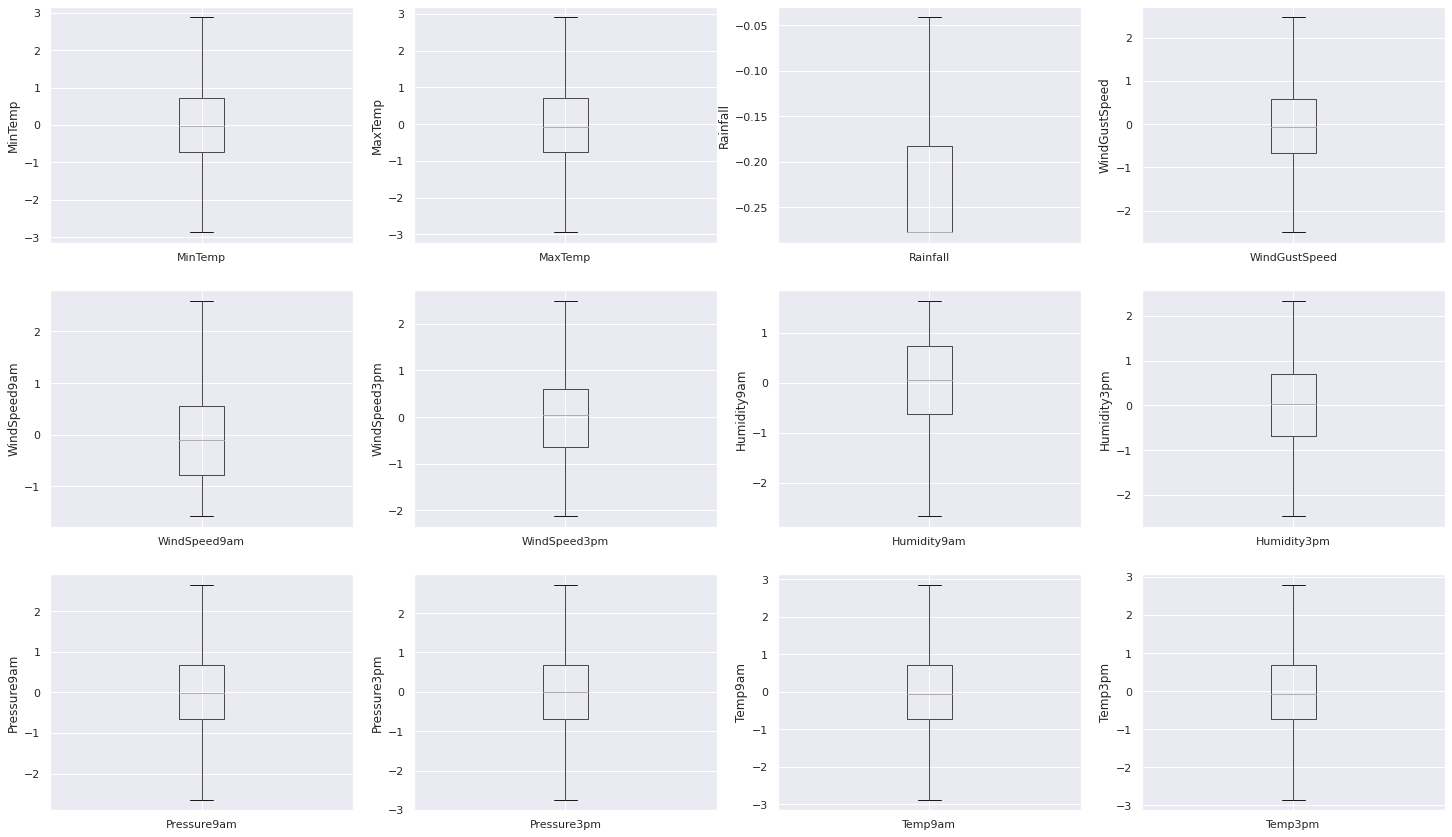

In [35]:
#Boxplot after Replacing the outliers with the max and min value from the numerical columns from the dataset
plt.figure(figsize=(25,20))
for i in range(len(num_features)):
  plt.subplot(4,4,i+1)
  fig = data.boxplot(column=num_features[i])
  fig.set_title("")
  fig.set_ylabel(num_features[i])

In [36]:
print("Count of RainTomorrow values after removing the outliers")
print(Counter(data['RainTomorrow']))

Count of RainTomorrow values after removing the outliers
Counter({'No': 109586, 'Yes': 31201})


## Handling missing values in numerical columns

Now we will impute the missing values in numerical columns by there mean values.

Since mean is sensitive to Outliers so we first standardized the numerical columns above and we are imputing the missing values using mean.

In [37]:
#Import the KNNImputer Class
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
imputer=imputer.fit(data[num_features])
data[num_features]=imputer.transform(data[num_features])
data

Location   MinTemp   MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury  0.189757 -0.047104 -0.206727           W       0.296762   
1        Albury -0.747179  0.262125 -0.277606         WNW       0.296762   
2        Albury  0.111679  0.346460 -0.277606         WSW       0.444058   
3        Albury -0.466098  0.669744 -0.277606          NE      -1.176193   
4        Albury  0.829996  1.274146 -0.159474           W       0.075819   
...         ...       ...       ...       ...         ...            ...   
145454    Uluru -1.356187 -0.201718 -0.277606           E      -0.660658   
145455    Uluru -1.465496  0.023175 -0.277606           E      -0.660658   
145456    Uluru -1.340571  0.290236 -0.277606         NNW      -1.323488   
145457    Uluru -1.059490  0.515130 -0.277606           N      -0.218772   
145458    Uluru -0.684716  0.529186 -0.277606          SE      -0.881602   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               W        WNW      0.676275      0.610232     0.113996   
1             NNW        WSW     -1.124274      0.382909    -1.302317   
2               W        WSW      0.563741      0.837555    -1.617054   
3              SE          E     -0.336533     -1.094689    -1.249861   
4             ENE         NW     -0.786671      0.155586     0.691012   
...           ...        ...           ...           ...          ...   
145454        ESE          E      0.113604     -0.640043    -0.515477   
145455         SE        ENE     -0.111465     -0.867366    -0.935125   
145456         SE          N     -0.111465     -1.094689    -0.672845   
145457         SE        WNW     -0.561602     -1.094689    -0.830213   
145458        SSE          N     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm RainToday  \
0         -1.415339    -1.401098    -1.159562 -0.013403  0.015397        No   
1         -1.271158    -0.992926    -1.060065  0.032779  0.375743        No   
2         -1.030857    -1.415173    -0.932140  0.617756  0.217191        No   
3         -1.703700    -0.007682    -0.349372  0.171326  0.692849        No   
4         -0.886677    -0.964776    -1.315914  0.125144  1.154093        No   
...             ...          ...          ...       ...       ...       ...   
145454    -1.175038     0.991637     0.844593 -1.167962 -0.114328        No   
145455    -1.319218     0.977562     0.716668 -1.060203  0.101880        No   
145456    -1.463399     0.822738     0.546102 -0.937050  0.404571        No   
145457    -1.319218     0.470865     0.219183 -0.690744  0.635193        No   
145458    -1.319218     0.245667     0.176542 -0.290497  0.620779        No   

       RainTomorrow  Year  Month  
0                No  2008     12  
1                No  2008     12  
2                No  2008     12  
3                No  2008     12  
4                No  2008     12  
...             ...   ...    ...  
145454           No  2017      6  
145455           No  2017      6  
145456           No  2017      6  
145457           No  2017      6  
145458           No  2017      6  

[140787 rows x 20 columns]

<Figure size 720x432 with 0 Axes>

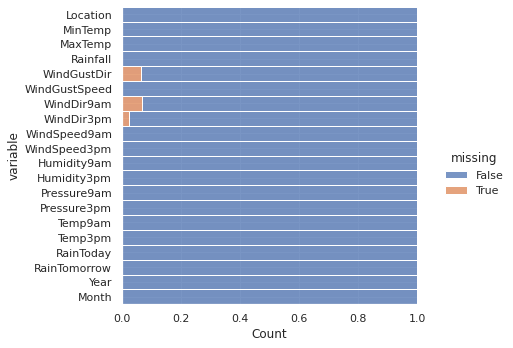

In [38]:
 plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

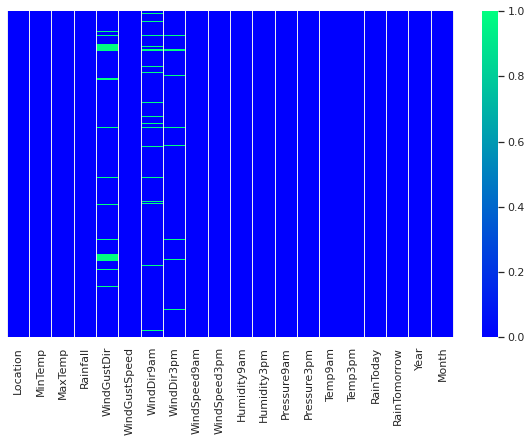

In [39]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='winter')

## Imputing missing values in categorical variables using most frequently occured Category

In [40]:
print(data['WindGustDir'].mode())
print(data['WindDir9am'].mode())
print(data['WindDir3pm'].mode())

0    W
dtype: object
0    N
dtype: object
0    SE
dtype: object


In [41]:
data['WindGustDir'].fillna('W',inplace=True)
data['WindDir9am'].fillna('N',inplace=True)
data['WindDir3pm'].fillna('SE',inplace=True)

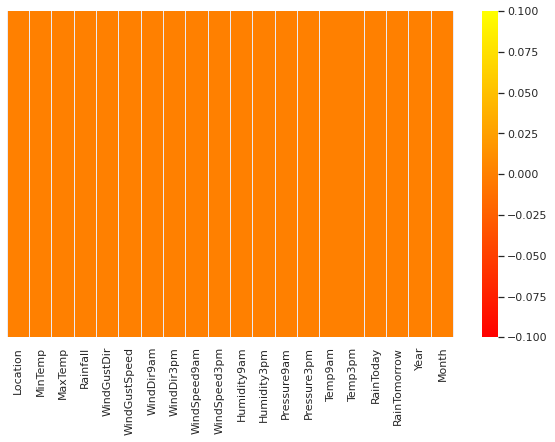

In [42]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='autumn')

Now our Data has no missing values

## Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
def convert_categorical_features(feature):
  le = LabelEncoder()
  feature_encoded = le.fit_transform(feature)
  return(feature_encoded)

In [44]:
for  feature in cat_features:
  data[feature]=convert_categorical_features(data[feature])

data[cat_features]

Location  WindGustDir  WindDir9am  WindDir3pm  RainToday  \
0              2           13          13          14          0   
1              2           14           6          15          0   
2              2           15          13          15          0   
3              2            4           9           0          0   
4              2           13           1           7          0   
...          ...          ...         ...         ...        ...   
145454        41            0           2           0          0   
145455        41            0           9           1          0   
145456        41            6           9           3          0   
145457        41            3           9          14          0   
145458        41            9          10           3          0   

        RainTomorrow  Year  Month  
0                  0     1     11  
1                  0     1     11  
2                  0     1     11  
3                  0     1     11  
4                  0     1     11  
...              ...   ...    ...  
145454             0    10      5  
145455             0    10      5  
145456             0    10      5  
145457             0    10      5  
145458             0    10      5  

[140787 rows x 8 columns]

In [45]:
data.describe()

Location        MinTemp        MaxTemp       Rainfall  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       23.720074      -0.000020       0.000218      -0.220227   
std        14.233401       0.998608       0.997175       0.093543   
min         0.000000      -2.870899      -2.942610      -0.277606   
25%        11.000000      -0.715947      -0.749897      -0.277606   
50%        24.000000      -0.028861      -0.089272      -0.277606   
75%        36.000000       0.720687       0.697856      -0.183101   
max        48.000000       2.875639       2.904625      -0.041343   

        WindGustDir  WindGustSpeed     WindDir9am     WindDir3pm  \
count  140787.00000  140787.000000  140787.000000  140787.000000   
mean        8.05362      -0.025568       7.006172       7.785740   
std         4.69313       0.940052       4.515248       4.547275   
min         0.00000      -2.501852       0.000000       0.000000   
25%         4.00000      -0.660658       3.000000       4.000000   
50%         9.00000      -0.100936       7.000000       8.000000   
75%        13.00000       0.561894      11.000000      12.000000   
max        15.00000       2.469370      15.000000      15.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       -0.012328      -0.017824       0.005030       0.000717   
std         0.964045       0.963686       0.989476       0.994030   
min        -1.574411      -2.117641      -2.666174      -2.472663   
25%        -0.786671      -0.640043      -0.620389      -0.694436   
50%        -0.111465      -0.185398       0.061540       0.026467   
75%         0.563741       0.610232       0.743468       0.651250   
max         2.589359       2.485644       1.635221       2.333357   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        0.027476       0.030411      -0.002380       0.003726   
std         0.955491       0.960044       0.999574       0.993517   
min        -2.639691      -2.737301      -2.869011      -2.852965   
25%        -0.598828      -0.619435      -0.721532      -0.719711   
50%         0.048618       0.048617      -0.044191      -0.071087   
75%         0.667914       0.674027       0.694726       0.678435   
max         2.652477       2.720824       2.857599       2.797275   

           RainToday   RainTomorrow           Year          Month  
count  140787.000000  140787.000000  140787.000000  140787.000000  
mean        0.223423       0.221618       5.757492       5.403482  
std         0.416541       0.415337       2.542272       3.426583  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       4.000000       2.000000  
50%         0.000000       0.000000       6.000000       5.000000  
75%         0.000000       0.000000       8.000000       8.000000  
max         1.000000       1.000000      10.000000      11.000000

In [46]:
#Creating a copy of preprocessed dataset
df=data.copy()

## Check for correlation between Numerical features


In [47]:
#creating a temporary dataframe for numerical features
temp_df = df[num_features]
temp_df

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.189757 -0.047104 -0.206727       0.296762      0.676275   
1      -0.747179  0.262125 -0.277606       0.296762     -1.124274   
2       0.111679  0.346460 -0.277606       0.444058      0.563741   
3      -0.466098  0.669744 -0.277606      -1.176193     -0.336533   
4       0.829996  1.274146 -0.159474       0.075819     -0.786671   
...          ...       ...       ...            ...           ...   
145454 -1.356187 -0.201718 -0.277606      -0.660658      0.113604   
145455 -1.465496  0.023175 -0.277606      -0.660658     -0.111465   
145456 -1.340571  0.290236 -0.277606      -1.323488     -0.111465   
145457 -1.059490  0.515130 -0.277606      -0.218772     -0.561602   
145458 -0.684716  0.529186 -0.277606      -0.881602     -0.111465   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.610232     0.113996    -1.415339    -1.401098    -1.159562   
1           0.382909    -1.302317    -1.271158    -0.992926    -1.060065   
2           0.837555    -1.617054    -1.030857    -1.415173    -0.932140   
3          -1.094689    -1.249861    -1.703700    -0.007682    -0.349372   
4           0.155586     0.691012    -0.886677    -0.964776    -1.315914   
...              ...          ...          ...          ...          ...   
145454     -0.640043    -0.515477    -1.175038     0.991637     0.844593   
145455     -0.867366    -0.935125    -1.319218     0.977562     0.716668   
145456     -1.094689    -0.672845    -1.463399     0.822738     0.546102   
145457     -1.094689    -0.830213    -1.319218     0.470865     0.219183   
145458     -1.322011    -0.935125    -1.319218     0.245667     0.176542   

         Temp9am   Temp3pm  
0      -0.013403  0.015397  
1       0.032779  0.375743  
2       0.617756  0.217191  
3       0.171326  0.692849  
4       0.125144  1.154093  
...          ...       ...  
145454 -1.167962 -0.114328  
145455 -1.060203  0.101880  
145456 -0.937050  0.404571  
145457 -0.690744  0.635193  
145458 -0.290497  0.620779  

[140787 rows x 12 columns]

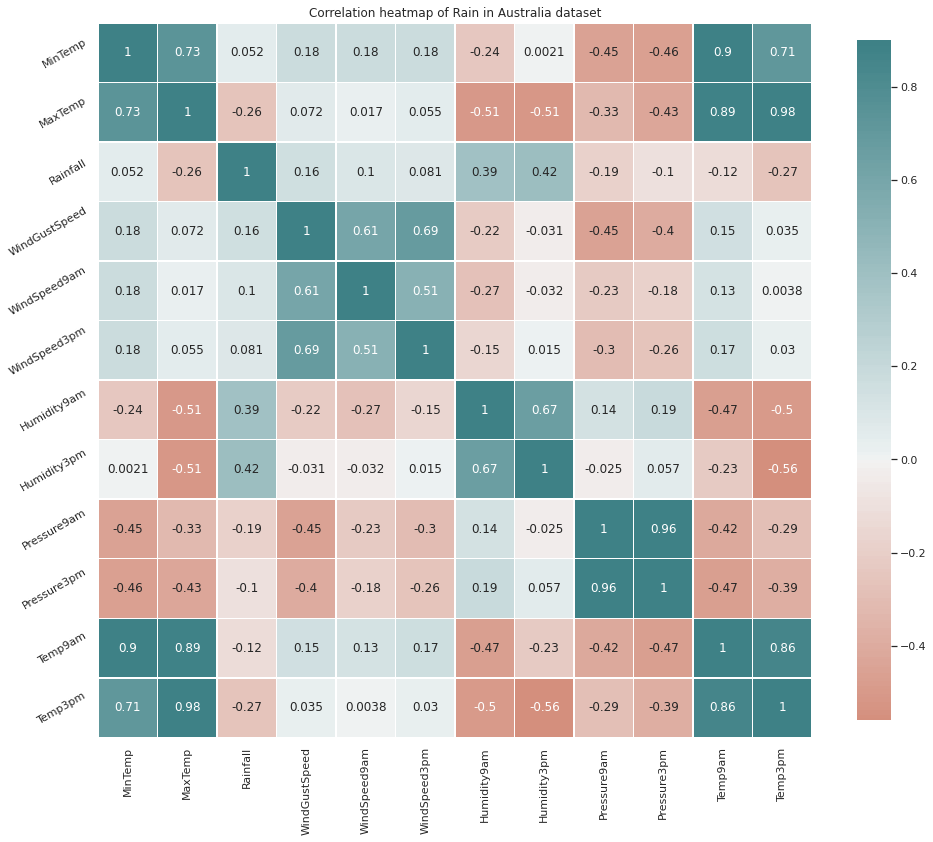

In [48]:
#correlation matrix
plt.figure(figsize=(16,25))
plt.title('Correlation heatmap of Rain in Australia dataset')
ax = sns.heatmap(temp_df.corr(),annot=True,vmax=0.9,center=0,
                 square=True,linewidths=0.5,cbar_kws={'shrink':.5},cmap=sns.diverging_palette(20,200,n=200))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=30)
plt.show()

In [49]:
for column1 in temp_df.columns:
  for column2 in range(temp_df.columns.get_loc(column1)+1,int((len(temp_df.columns)))):
    if temp_df[column1].corr(temp_df.iloc[:,column2])>=0.9:
      print(f"{column1} and {temp_df.columns[column2]} are highly correlated")

MinTemp and Temp9am are highly correlated
MaxTemp and Temp3pm are highly correlated
Pressure9am and Pressure3pm are highly correlated


In [50]:
#merging cells with high correlation
morning_temp=(df['MinTemp']+df['Temp9am'])/2
noon_temp=(df['MaxTemp']+df['Temp3pm'])/2
new_pressure=(df['Pressure9am']+df['Pressure3pm'])/2\

temp_df['Morning_temp'] = morning_temp
temp_df['Noon_temp'] = noon_temp
temp_df['New_pressure'] = new_pressure
temp_df.drop(["MinTemp","Temp9am","MaxTemp","Temp3pm","Pressure9am","Pressure3pm"],inplace=True , axis = 1 )
temp_df.head()

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0 -0.206727       0.296762      0.676275      0.610232     0.113996   
1 -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2 -0.277606       0.444058      0.563741      0.837555    -1.617054   
3 -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4 -0.159474       0.075819     -0.786671      0.155586     0.691012   

   Humidity3pm  Morning_temp  Noon_temp  New_pressure  
0    -1.415339      0.088177  -0.015854     -1.280330  
1    -1.271158     -0.357200   0.318934     -1.026495  
2    -1.030857      0.364717   0.281825     -1.173657  
3    -1.703700     -0.147386   0.681297     -0.178527  
4    -0.886677      0.477570   1.214119     -1.140345

In [51]:
df['Morning_temp'] = morning_temp
df['Noon_temp'] = noon_temp
df['New_pressure'] = new_pressure
df.drop(["MinTemp","Temp9am","MaxTemp","Temp3pm","Pressure9am","Pressure3pm"],inplace=True , axis = 1 )
df.head()

Location  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0         2 -0.206727           13       0.296762          13          14   
1         2 -0.277606           14       0.296762           6          15   
2         2 -0.277606           15       0.444058          13          15   
3         2 -0.277606            4      -1.176193           9           0   
4         2 -0.159474           13       0.075819           1           7   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  RainToday  \
0      0.676275      0.610232     0.113996    -1.415339          0   
1     -1.124274      0.382909    -1.302317    -1.271158          0   
2      0.563741      0.837555    -1.617054    -1.030857          0   
3     -0.336533     -1.094689    -1.249861    -1.703700          0   
4     -0.786671      0.155586     0.691012    -0.886677          0   

   RainTomorrow  Year  Month  Morning_temp  Noon_temp  New_pressure  
0             0     1     11      0.088177  -0.015854     -1.280330  
1             0     1     11     -0.357200   0.318934     -1.026495  
2             0     1     11      0.364717   0.281825     -1.173657  
3             0     1     11     -0.147386   0.681297     -0.178527  
4             0     1     11      0.477570   1.214119     -1.140345

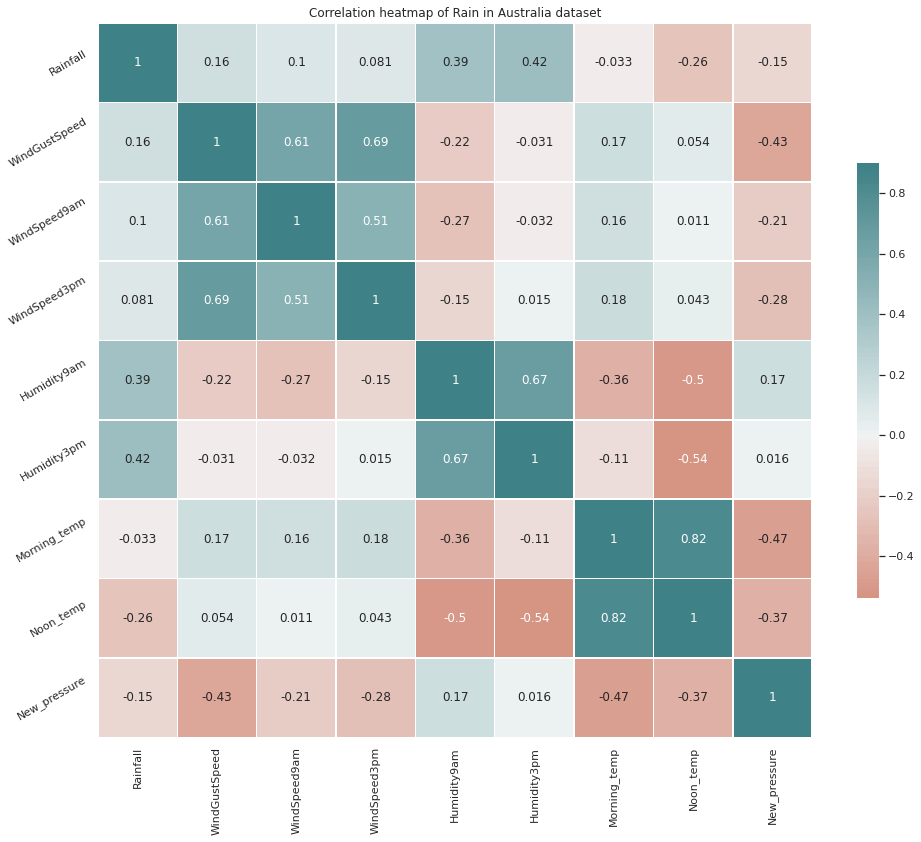

In [52]:
#correlation matrix
plt.figure(figsize=(16,16))
plt.title('Correlation heatmap of Rain in Australia dataset')
ax = sns.heatmap(temp_df.corr(),annot=True,vmax=0.9,center=0,
                 square=True,linewidths=0.5,cbar_kws={'shrink':.5},cmap=sns.diverging_palette(20,200,n=200))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=30)
plt.show()

## Checking multicollinearity using VIF

In [53]:
def vif(Z3):
  vif_data = pd.DataFrame()
  vif_data["feature"] = Z3.columns
  vif_data["VIF"] = [variance_inflation_factor(np.array(Z3),i)
  for i in range(len(Z3.columns))]
  return vif_data

In [54]:
vif_df = vif(temp_df)
vif_df.sort_values(by=['VIF'],ascending=False)

feature       VIF
7      Noon_temp  9.594395
6   Morning_temp  7.771823
5    Humidity3pm  4.505118
1  WindGustSpeed  2.626201
4    Humidity9am  2.485252
3   WindSpeed3pm  1.976878
2   WindSpeed9am  1.807381
8   New_pressure  1.568601
0       Rainfall  1.054257

In [55]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [56]:
calculate_vif_(temp_df,5)

dropping 'Noon_temp' at index: 7
Remaining variables:
Index(['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Morning_temp', 'New_pressure'],
      dtype='object')


Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0      -0.206727       0.296762      0.676275      0.610232     0.113996   
1      -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2      -0.277606       0.444058      0.563741      0.837555    -1.617054   
3      -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4      -0.159474       0.075819     -0.786671      0.155586     0.691012   
...          ...            ...           ...           ...          ...   
145454 -0.277606      -0.660658      0.113604     -0.640043    -0.515477   
145455 -0.277606      -0.660658     -0.111465     -0.867366    -0.935125   
145456 -0.277606      -1.323488     -0.111465     -1.094689    -0.672845   
145457 -0.277606      -0.218772     -0.561602     -1.094689    -0.830213   
145458 -0.277606      -0.881602     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Morning_temp  New_pressure  
0         -1.415339      0.088177     -1.280330  
1         -1.271158     -0.357200     -1.026495  
2         -1.030857      0.364717     -1.173657  
3         -1.703700     -0.147386     -0.178527  
4         -0.886677      0.477570     -1.140345  
...             ...           ...           ...  
145454    -1.175038     -1.262074      0.918115  
145455    -1.319218     -1.262849      0.847115  
145456    -1.463399     -1.138811      0.684420  
145457    -1.319218     -0.875117      0.345024  
145458    -1.319218     -0.487607      0.211104  

[140787 rows x 8 columns]

In [57]:
#Dropping the Noon_temp column
df.drop(['Noon_temp'],axis=1,inplace=True)
temp_df.drop(['Noon_temp'],axis=1,inplace=True)
temp_df

Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0      -0.206727       0.296762      0.676275      0.610232     0.113996   
1      -0.277606       0.296762     -1.124274      0.382909    -1.302317   
2      -0.277606       0.444058      0.563741      0.837555    -1.617054   
3      -0.277606      -1.176193     -0.336533     -1.094689    -1.249861   
4      -0.159474       0.075819     -0.786671      0.155586     0.691012   
...          ...            ...           ...           ...          ...   
145454 -0.277606      -0.660658      0.113604     -0.640043    -0.515477   
145455 -0.277606      -0.660658     -0.111465     -0.867366    -0.935125   
145456 -0.277606      -1.323488     -0.111465     -1.094689    -0.672845   
145457 -0.277606      -0.218772     -0.561602     -1.094689    -0.830213   
145458 -0.277606      -0.881602     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Morning_temp  New_pressure  
0         -1.415339      0.088177     -1.280330  
1         -1.271158     -0.357200     -1.026495  
2         -1.030857      0.364717     -1.173657  
3         -1.703700     -0.147386     -0.178527  
4         -0.886677      0.477570     -1.140345  
...             ...           ...           ...  
145454    -1.175038     -1.262074      0.918115  
145455    -1.319218     -1.262849      0.847115  
145456    -1.463399     -1.138811      0.684420  
145457    -1.319218     -0.875117      0.345024  
145458    -1.319218     -0.487607      0.211104  

[140787 rows x 8 columns]

In [58]:
data

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0              2  0.189757 -0.047104 -0.206727           13       0.296762   
1              2 -0.747179  0.262125 -0.277606           14       0.296762   
2              2  0.111679  0.346460 -0.277606           15       0.444058   
3              2 -0.466098  0.669744 -0.277606            4      -1.176193   
4              2  0.829996  1.274146 -0.159474           13       0.075819   
...          ...       ...       ...       ...          ...            ...   
145454        41 -1.356187 -0.201718 -0.277606            0      -0.660658   
145455        41 -1.465496  0.023175 -0.277606            0      -0.660658   
145456        41 -1.340571  0.290236 -0.277606            6      -1.323488   
145457        41 -1.059490  0.515130 -0.277606            3      -0.218772   
145458        41 -0.684716  0.529186 -0.277606            9      -0.881602   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0               13          14      0.676275      0.610232     0.113996   
1                6          15     -1.124274      0.382909    -1.302317   
2               13          15      0.563741      0.837555    -1.617054   
3                9           0     -0.336533     -1.094689    -1.249861   
4                1           7     -0.786671      0.155586     0.691012   
...            ...         ...           ...           ...          ...   
145454           2           0      0.113604     -0.640043    -0.515477   
145455           9           1     -0.111465     -0.867366    -0.935125   
145456           9           3     -0.111465     -1.094689    -0.672845   
145457           9          14     -0.561602     -1.094689    -0.830213   
145458          10           3     -0.111465     -1.322011    -0.935125   

        Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  RainToday  \
0         -1.415339    -1.401098    -1.159562 -0.013403  0.015397          0   
1         -1.271158    -0.992926    -1.060065  0.032779  0.375743          0   
2         -1.030857    -1.415173    -0.932140  0.617756  0.217191          0   
3         -1.703700    -0.007682    -0.349372  0.171326  0.692849          0   
4         -0.886677    -0.964776    -1.315914  0.125144  1.154093          0   
...             ...          ...          ...       ...       ...        ...   
145454    -1.175038     0.991637     0.844593 -1.167962 -0.114328          0   
145455    -1.319218     0.977562     0.716668 -1.060203  0.101880          0   
145456    -1.463399     0.822738     0.546102 -0.937050  0.404571          0   
145457    -1.319218     0.470865     0.219183 -0.690744  0.635193          0   
145458    -1.319218     0.245667     0.176542 -0.290497  0.620779          0   

        RainTomorrow  Year  Month  
0                  0     1     11  
1                  0     1     11  
2                  0     1     11  
3                  0     1     11  
4                  0     1     11  
...              ...   ...    ...  
145454             0    10      5  
145455             0    10      5  
145456             0    10      5  
145457             0    10      5  
145458             0    10      5  

[140787 rows x 20 columns]

In [59]:
num_features = [column_name for column_name in df.columns if df[column_name].dtype=='float64']
data['Morning_temp']=morning_temp
data['New_pressure']=new_pressure
data.drop(['MinTemp','Temp9am','MaxTemp','Temp3pm','Pressure9am','Pressure3pm'],inplace=True , axis=1)

data[num_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Rainfall       140787 non-null  float64
 1   WindGustSpeed  140787 non-null  float64
 2   WindSpeed9am   140787 non-null  float64
 3   WindSpeed3pm   140787 non-null  float64
 4   Humidity9am    140787 non-null  float64
 5   Humidity3pm    140787 non-null  float64
 6   Morning_temp   140787 non-null  float64
 7   New_pressure   140787 non-null  float64
dtypes: float64(8)
memory usage: 13.7 MB


## Exporting data file to csv to perform stepwise variable selection on R

In [60]:
from google.colab import files
data.to_csv('aus_data.csv')
#files.download("aus_data.csv")

In [61]:
#best variable selected  using Stepwise Feature Selection
best_var = ['Location','Rainfall','WindGustSpeed','WindDir9am','WindSpeed9am','WindSpeed3pm','Humidity9am',
            'Humidity3pm','RainToday','Year','Month','Morning_temp','New_pressure']

We started with 22 variables and finally choosen best 13 variables to fit the model.

## Train-Test split

In [62]:
#Splitting dataset into X(explanatory) and Y(target variable)
X = data[best_var]
y=data['RainTomorrow']

### Oversampling using SMOTE to deal with imbalanced data

In [63]:
# Split X and y into trainning testing sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=0,
                                                      stratify=y)

In [64]:
X_train.shape , X_test.shape

((112629, 13), (28158, 13))

### SMOTE

In [65]:
oversample= SMOTE()
X_train_smote , y_train_smote = oversample.fit_resample(X_train,y_train)

### Model training and accuracy checking

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# Put Models in a dictionary
models = {"Logistic regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train_smote,x_test,y_train_smote,y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different SciKit-Learn machine learning models
    x_train_smote : training data (no labels)
    x_test : testing data (no labels)
    y_train_smote : training labels
    y_test : testing labels
    """
    #set random seed
    np.random.seed(32)
    # Make a Dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train_smote, y_train_smote)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [68]:
model_scores = fit_and_score(models=models,
                             x_train_smote=X_train_smote,
                             x_test=X_test,
                             y_train_smote=y_train_smote,
                             y_test=y_test)
model_scores

{'Logistic regression': 0.7903260174728319,
 'KNN': 0.7605653810639961,
 'Random Forest': 0.8379856523900845}

### Model comparison

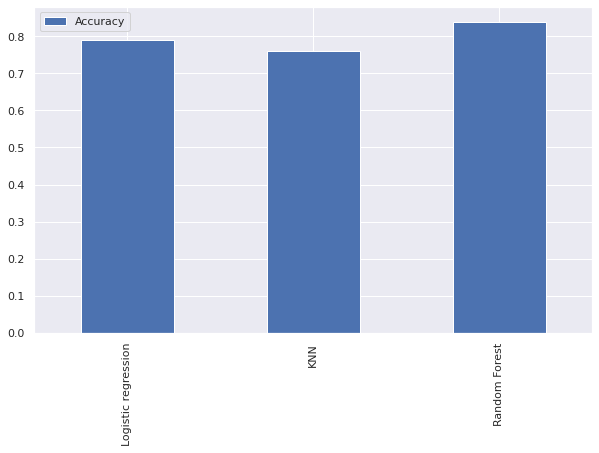

In [69]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

Comparing  Accuracy score  of three models we can say that RandomForestClassifier best fits our dataset.

Now we have got a baseline model and we know that a model's first predictictions aren't always what we should based our next steps off.

Let's look at the folloowing
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Feature Importance

In [73]:
clf = RandomForestClassifier()
clf.fit(X_train_smote,y_train_smote)
clf.feature_importances_

array([0.04701272, 0.1367875 , 0.09442925, 0.04082491, 0.05595839,
       0.06336966, 0.09016734, 0.23183952, 0.01505925, 0.03209337,
       0.0347052 , 0.06505885, 0.09269404])

In [72]:
X_train_smote.head()

Location  Rainfall  WindGustSpeed  WindDir9am  WindSpeed9am  WindSpeed3pm  \
0        31 -0.277606      -0.366068          12      0.338672     -0.412720   
1        11 -0.277606       1.033239          11      2.139221      1.405861   
2        34 -0.277606       0.738649           3     -1.574411     -1.322011   
3        43 -0.183101      -0.366068          14     -0.561602     -0.640043   
4        24 -0.277606      -1.220381           3     -1.574411     -2.117641   

   Humidity9am  Humidity3pm  RainToday  Year  Month  Morning_temp  \
0    -0.515477     0.939611          0     7     11      0.785785   
1    -0.358109     0.939611          0     8      8     -0.203259   
2     1.320485     2.189177          0     2      8     -0.929329   
3     1.635221     2.093056          0     8      2      0.266649   
4    -0.043372     0.891551          0     2      5     -0.523877   

   New_pressure  
0     -1.103490  
1      0.318472  
2      0.458805  
3      0.156055  
4      0.877645

In [74]:
#Make a dictionary of features
features = {"Location":0.04701272,
            "Rainfall":0.1367875,
            "WindGustSpeed":0.09442925,
            "WindDir9am":0.04082491,
            "WindSpeed9am":0.05595839,
            "WindSpeed3pm":0.06336966,
            "Humidity9am":0.09016734,
            "Humidity3pm":0.23183952,
            "RainToday":0.01505925,
            "Year":0.03209337,
            "Month":0.0347052,
            "Morning_temp":0.06505885,
            "New_Pressure":0.09269404 }

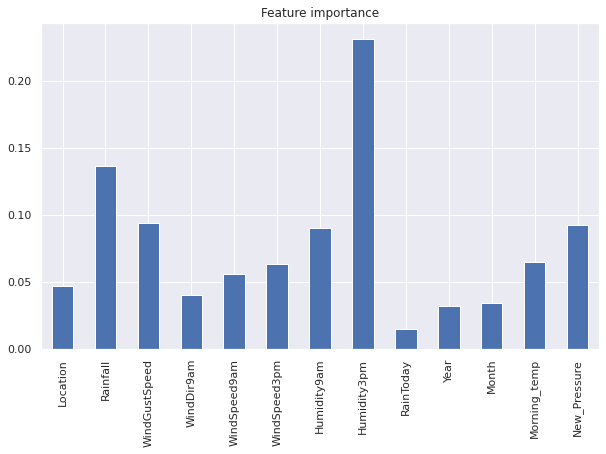

In [75]:
feature_df=pd.DataFrame(features,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);

## Model Evaluation

In [82]:
y_preds = clf.predict(X_test)
print(y_preds)
print(len(y_preds))

[0 0 0 ... 0 1 0]
28158


In [83]:
y_test

34349     0
95693     0
119511    0
80961     0
54300     1
         ..
94239     0
50555     0
13559     0
81830     1
36844     0
Name: RainTomorrow, Length: 28158, dtype: int64

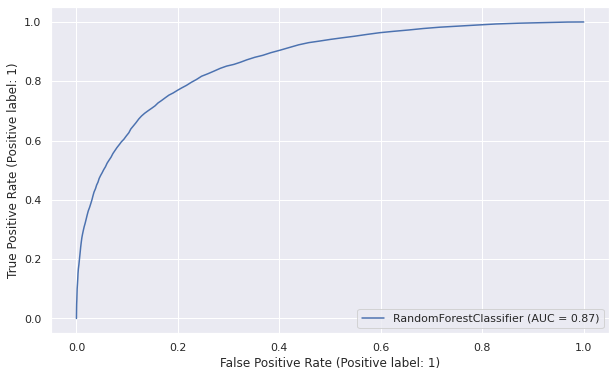

In [85]:
#plotting ROC curve and calculate AUC matrix
plot_roc_curve(clf,X_test,y_test);

In [86]:
print(confusion_matrix(y_test,y_preds))

[[19653  2265]
 [ 2331  3909]]


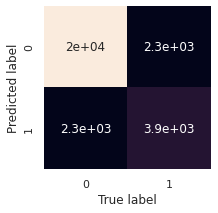

In [87]:
sns.set(font_scale=1)
def plot_conf_mat(y_test,y_preds):
    """
    plots a confusion matrix using Seaborn's Heatmap
    """
    fig, ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
      
plot_conf_mat(y_test,y_preds)

In [88]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     21918
           1       0.63      0.63      0.63      6240

    accuracy                           0.84     28158
   macro avg       0.76      0.76      0.76     28158
weighted avg       0.84      0.84      0.84     28158



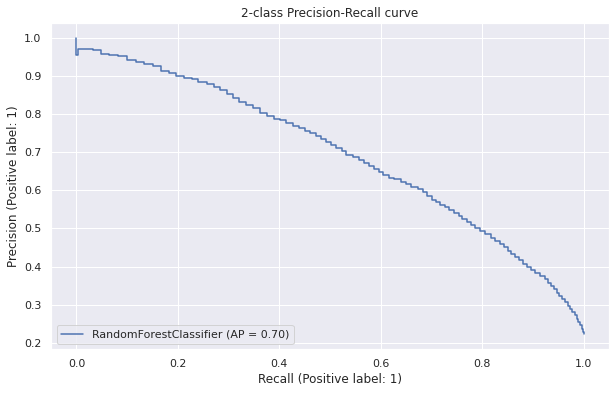

In [93]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, 
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
#precision_recall_curve(y_test,y_preds)

#### Evaluation metrices using cross validation score

In [95]:
clf = RandomForestClassifier()
clf.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [97]:
#cross validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.8424604 , 0.83042119, 0.83972014, 0.84298753, 0.84927372])

In [98]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8409725973534347

In [99]:
#cross validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision= np.mean(cv_precision)
cv_precision

0.7128141581926244

In [100]:
cv_precision = np.mean(cv_precision)

In [102]:
#cross validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall

array([0.46746795, 0.52026919, 0.5161859 , 0.46057692, 0.45560897])

In [103]:
cv_recall = np.mean(cv_recall)
cv_recall

0.4840217862439862

In [104]:
#cross validated f1 score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.56896385, 0.57343653, 0.58826744, 0.56914105, 0.57165894])

In [105]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.574293561301144

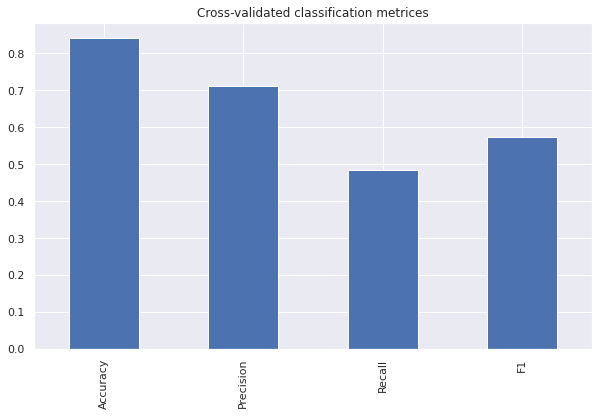

In [106]:
#visualise cross validated metrices
cv_metrices = pd.DataFrame({"Accuracy":cv_acc,
               "Precision":cv_precision,
               "Recall":cv_recall,
               "F1":cv_f1},
               index=[0])
cv_metrices.T.plot.bar(title="Cross-validated classification metrices",
                       legend=False);